In [761]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [762]:
votre_path="/Users/asus/Documents/Python Scripts/challenge/"
data_path=votre_path+"Xtrain.csv"
Xtrain=pd.read_csv(data_path,sep = ',',header = 0)
data_path=votre_path+"Ytrain.csv"
Ytrain=pd.read_csv(data_path,sep = ';',header = 0)
data_path=votre_path+"Xtest.csv"
Xtest=pd.read_csv(data_path,sep = ',',header = 0)
data_path=votre_path+"Ytest.csv"
Ytest=pd.read_csv(data_path,sep = ',',header = 0)


In [763]:
def DataSample(X,ID,index):
    'X:dataframe of input data'
    'Id = id, from 0 to 999'
    'index = index of channel, from 1 to 12'
    return X.iloc[ID,1+(index-1)*750:1+index*750] 

## selected features
centre_1=[]
channel = 1
columne = [j for j in range((channel-1)*750,750*channel-1)]
for i in range (1000):
    Xtrain_num  = Xtrain.iloc[i,columne]
    A=pd.Series(Xtrain_num).tolist()
    index=0
    B=max(A[33:684])
    for j in range(749):
        if A[j] == B:
            index=j
    centre_loc=[]
    for j in range(index-33,index+66):
        centre_loc.append(A[j])
    centre_1.append(centre_loc)

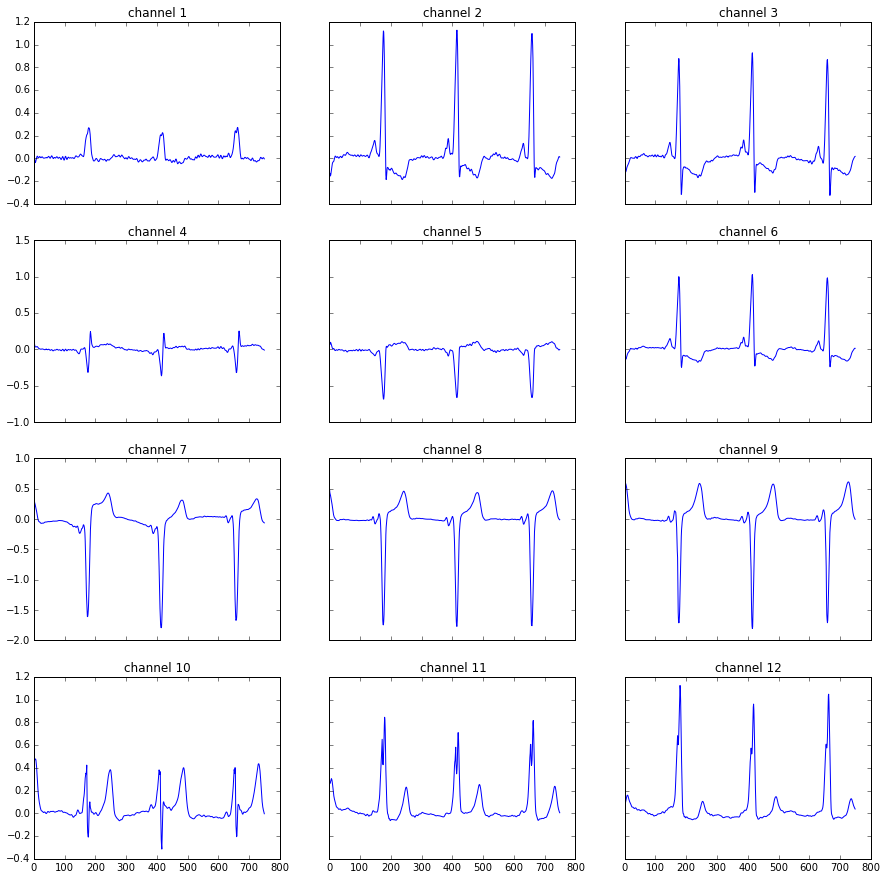

In [766]:
fig, ((ax1, ax2, ax3), (ax4, ax5,ax6),(ax7, ax8, ax9), (ax10, ax11,ax12)) = plt.subplots(4, 3, sharex='col', sharey='row')
fig.set_size_inches(15, 15)

for (ax,i) in zip((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12),range(1,13,1)):
    ax.plot(DataSample(Xtest,8,i))
    ax.set_title('channel '+str(i))

In [5]:
centre_2=[]
simple = 1001
channel = 2
columne = [j for j in range((channel-1)*750,750*channel-1)]
for i in range (0,simple-1):
    Xtrain_num  = Xtrain.iloc[i,columne]
    A=pd.Series(Xtrain_num).tolist()
    index=0
    B=max(A[33:684])
    for j in range(749):
        if A[j] == B:
            index=j
    centre_loc=[]
    for j in range(index-33,index+66):
        centre_loc.append(A[j])
    centre_2.append(centre_loc)

In [6]:
X=pd.DataFrame(centre_1)
X_1=preprocessing.scale(X)
pca = PCA(n_components=10)
pca.fit(X_1)
# ratio de la val propre / Inertie totale  (= somme de toutes les valeurs propres) :
pca.explained_variance_ratio_

array([ 0.33492098,  0.21986813,  0.11797658,  0.08058356,  0.06094181,
        0.03283723,  0.02777709,  0.02230569,  0.01614964,  0.01476096])

In [7]:
# ajuste ces composantes sur les données 
pca_1 = pca.transform(X_1)
pca_1_Comp0 = pca_1[:,0]
pca_1_Comp1 = pca_1[:,1]
pca_1_Comp2 = pca_1[:,2]
pca_1_Comp3 = pca_1[:,3]
pca_1_Comp4 = pca_1[:,4]
pca_1_Comp5 = pca_1[:,5]
pca_1_Comp6 = pca_1[:,6]
pca_1_Comp7 = pca_1[:,7]
pca_1_Comp8 = pca_1[:,8]
pca_1_Comp9 = pca_1[:,9]

In [8]:
X=pd.DataFrame(centre_2)
X_2=preprocessing.scale(X)
pca = PCA(n_components=10)
pca.fit(X_2)
# ratio de la val propre / Inertie totale  (= somme de toutes les valeurs propres) :
pca.explained_variance_ratio_

array([ 0.343769  ,  0.17304029,  0.12446313,  0.09076286,  0.06775599,
        0.03963328,  0.03277294,  0.02534842,  0.01870166,  0.01691613])

In [9]:
# ajuste ces composantes sur les données 
pca_2 = pca.transform(X_2)
pca_2_Comp0 = pca_2[:,0]
pca_2_Comp1 = pca_2[:,1]
pca_2_Comp2 = pca_2[:,2]
pca_2_Comp3 = pca_2[:,3]
pca_2_Comp4 = pca_2[:,4]
pca_2_Comp5 = pca_2[:,5]
pca_2_Comp6 = pca_2[:,6]
pca_2_Comp7 = pca_2[:,7]
pca_2_Comp8 = pca_2[:,8]
pca_2_Comp9 = pca_2[:,9]

In [10]:
mean1_ty1=np.array(pca_1[0,:])
mean2_ty1=np.array(pca_2[0,:])
                   
mean1_ty2=np.array(pca_1[2,:])
mean2_ty2=np.array(pca_2[2,:])
                    
mean1_ty3=np.array(pca_1[5,:])
mean2_ty3=np.array(pca_2[5,:])

mean1_ty4=np.array(pca_1[8,:])
mean2_ty4=np.array(pca_2[8,:])

mean1_ty5=np.array(pca_1[14,:])
mean2_ty5=np.array(pca_2[14,:])

mean1_ty6=np.array(pca_1[4,:])
mean2_ty6=np.array(pca_2[4,:])


In [12]:
nm1=0
nm2=0
nm3=0
nm4=0
nm5=0
nm6=0
for i in range (1000): 
            test1 = np.array(pca_1[i,:])
            test2 = np.array(pca_2[i,:])
            err = [np.linalg.norm(test1-mean1_ty1)+np.linalg.norm(test2-mean2_ty1),
                   np.linalg.norm(test1-mean1_ty2)+np.linalg.norm(test2-mean2_ty2),
                   np.linalg.norm(test1-mean1_ty3)+np.linalg.norm(test2-mean2_ty3),
                   np.linalg.norm(test1-mean1_ty4)+np.linalg.norm(test2-mean2_ty4),
                   np.linalg.norm(test1-mean1_ty5)+np.linalg.norm(test2-mean2_ty5),
                   np.linalg.norm(test1-mean1_ty6)+np.linalg.norm(test2-mean2_ty6)]
            if err[0] == min(err):
                nm1 += 1
                mean1_ty1 = (mean1_ty1*nm1+test1)/(nm1+1)
                mean2_ty1 = (mean2_ty1*nm1+test2)/(nm1+1)
            elif err[1] == min(err):
                nm2 += 1
                mean1_ty2 = (mean1_ty2*nm2+test1)/(nm2+1)
                mean2_ty2 = (mean2_ty2*nm2+test2)/(nm2+1)
            elif err[2] == min(err):
                nm3 += 1
                mean1_ty3 = (mean1_ty3*nm3+test1)/(nm3+1)
                mean2_ty3 = (mean2_ty3*nm3+test2)/(nm3+1)
            elif err[3] == min(err):
                nm4 += 1
                mean1_ty4 = (mean1_ty4*nm4+test1)/(nm4+1)
                mean2_ty4 = (mean2_ty4*nm4+test2)/(nm4+1)
            elif err[4] == min(err):
                nm5 += 1
                mean1_ty5 = (mean1_ty5*nm5+test1)/(nm5+1)
                mean2_ty5 = (mean2_ty5*nm5+test2)/(nm5+1)
            elif err[5] == min(err):
                nm6 += 1
                mean1_ty6 = (mean1_ty6*nm6+test1)/(nm6+1)
                mean2_ty6 = (mean2_ty6*nm6+test2)/(nm6+1)
        

In [17]:
answer=[1 for i in range (1000)]
for i in range (1000):
    test1 = np.array(pca_1[i,:])
    test2 = np.array(pca_2[i,:])
    err = [np.linalg.norm(test1-mean1_ty1)+np.linalg.norm(test2-mean2_ty1),np.linalg.norm(test1-mean1_ty2)+np.linalg.norm(test2-mean2_ty2),np.linalg.norm(test1-mean1_ty3)+np.linalg.norm(test2-mean2_ty3),np.linalg.norm(test1-mean1_ty4)+np.linalg.norm(test2-mean2_ty4),np.linalg.norm(test1-mean1_ty5)+np.linalg.norm(test2-mean2_ty5),np.linalg.norm(test1-mean1_ty6)+np.linalg.norm(test2-mean2_ty6)]
    if err[5] == min(err) or err[1] == min(err):
        answer[i]= 0

In [18]:
cst=0
for i in range (1000):
    if answer[i] == Ytrain.iloc[i,1]:
        cst += 1
cst

698

In [141]:
##deuxieme methode:kmeans de package
from sklearn import cluster
n_clusters = 2
np.random.seed(0)

In [142]:
pca_12=[]
for i in range (1000):
    pca_12.append(np.append(pca_1[i],pca_2[i]))

In [143]:
X=pca_12
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
labels

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1,

In [144]:
cst=0
for i in range (1000):
    if labels[i] == Ytrain.iloc[i,1]:
        cst += 1
cst

655

<matplotlib.colorbar.Colorbar instance at 0x0000000027869348>

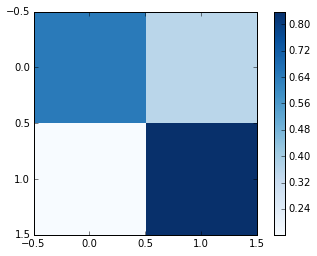

In [172]:
from sklearn.metrics import confusion_matrix
M  = confusion_matrix(answer,Ytrain.iloc[0:1000,1]) 
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]
plt.imshow(M_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
#plt.title("Matrice de confusion ")
#plt.tight_layout()
#plt.ylabel(' ')
#plt.xlabel(' ')